# Capstone Project 1


Name: Dámaris Flores Albores  
Date: November 2022


### The Steps  
1.- For this project we will start by evaluating the business needs and determine our key questions from which we will start our data exploration an analysis. 

2.- After that we will do a first data exploration of our given datasets and determined (based on our actual resources and timeline) the datasets to work with. 

3.- The next step will be cleaning our dataset: look for null data, renaming columns and changing the type of certain columns for analysis purposes.  

4.- More data exploration. We will look for outliers and some first descriptive statistics to have a better understanding of the data.  

5.- We will perform an hypothesis testing to proove if our findings are statistically significant.  

6.- At the same time we do the analysis, we will create some data visualizations to communicate our findings.  

7.- It's time to do our recommendation. Based on our findings we will get to a conclusion and translate it into actionable insights.  

8.- Explore further steps. Sugestion of next steps for a deeper analysis and more recomendations based on our client needs.


####        Let's start!

# Business Understanding

Computing Vision sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio. We are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. Then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

#### As  a new movie studio, what are the business needs?   

As we know, this is a newly formed movie studio, and their principal need, as any other business, is to get profits so it can keep doing movies.  

#### What does a succesfull movie means?  

For this purpose we will understand a succesfull movie as the one that is profitable.   

#### How much should be spend for a higher return of investment?  

Profits can be measured by their return of investment, so we will drive our analysis on this direction to be able to respond this question.   

        # Data Understanding

        First data exploration of our given data sets.   
        We will open and read each of them to understand what each of them contains.  

In [2]:
# Start by importing all the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from scipy import stats 
import math

In [3]:
# Starting with the csv 
movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('Data/rt.movie_info.tsv.gz', sep="\t")
reviews = pd.read_csv('Data/rt.reviews.tsv.gz', sep= '\t', encoding = 'unicode_escape')
movies = pd.read_csv('Data/tmdb.movies.csv.gz')
budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')

In [4]:
# Understanding movie_gross.csv
# Number of entries, columns and types
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# The first five entries.
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# Understanding movie_info.csv
# Number of entries, columns and types
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
# The first five entries.
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
# Understanding reviews.csv
# Number of entries, columns and types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [9]:
# The first five entries.
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
# Understanding movies.csv
# Number of entries, columns and types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# The first five entries.
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
# Understanding budgets.csv
# Number of entries, columns and types
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
# The first five entries.
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# Understanding the sqlite dataset 
conn = sqlite3.connect('Data/im.db')
# persons table
pd.read_sql("""
SELECT 
       * 
FROM 
       persons;

""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [15]:
# known_for table
pd.read_sql("""
SELECT 
       * 
FROM 
       known_for;

""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [16]:
# director table
pd.read_sql("""
SELECT 
       * 
FROM 
       directors;

""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [17]:
# writers table
pd.read_sql("""
SELECT 
       * 
FROM 
       writers;

""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [18]:
# movie_basics table
pd.read_sql("""
SELECT 
       * 
FROM 
       movie_basics;

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
# movie_ratings table
pd.read_sql("""
SELECT 
       * 
FROM 
       movie_ratings;

""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Conclusion of first exploration of data  
After the first exploration and given the timeline I will focus on the budgets.csv dataset,there are some other datasets that will like to explore, but I will keep them for the next steps section.

# Data Cleaning and Preparation

In [20]:
# Changing the release_date to datetime format
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')
# Getting rid og special characters '$' and ','
budgets['production_budget'] = budgets['production_budget'].replace('\$', '', regex=True)
budgets['production_budget'] = budgets['production_budget'].replace(',', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('\$', '', regex=True)
budgets['domestic_gross'] = budgets['domestic_gross'].replace(',', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('\$', '', regex=True)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace(',', '', regex=True)
# Changing to int64 format our columns
budgets['production_budget'] = budgets['production_budget'].astype('int64')
budgets['domestic_gross'] = budgets['domestic_gross'].astype('int64')
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype('int64')
# Checking the results
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [21]:
# Renaming our columns 
budgets.rename(columns = {'release_date':'Release', 'movie':'Title', 'id': 'ID', 
                          'production_budget': 'Budget','domestic_gross':'Domestic Gross', 'worldwide_gross': 'WorldWide Gross'}, inplace = True)
budgets.head(3)

,ID,Release,Title,Budget,Domestic Gross,WorldWide Gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350


In [22]:
# Creating Revenues and ROI column
budgets['Revenues'] = budgets['WorldWide Gross']-budgets['Budget']
budgets['ROI'] = budgets['Revenues']/budgets['Budget']
budgets.head()

,ID,Release,Title,Budget,Domestic Gross,WorldWide Gross,Revenues,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


# Data Exploration and Analysis

In [23]:
# Is there is a correlation between budget and revenues?  
corrbnr = budgets['Budget'].corr(budgets['WorldWide Gross'])
print ("Correlation between Budget and WWGross is: ", round(corrbnr, 2))

Correlation between Budget and WWGross is:  0.75


In [24]:
#but a very little negative correlation between budget and roi
corrbnroi = budgets['Budget'].corr(budgets['ROI'])
print ("Correlation between Budget and ROI is: ", round(corrbnroi, 2))

Correlation between Budget and ROI is:  -0.05


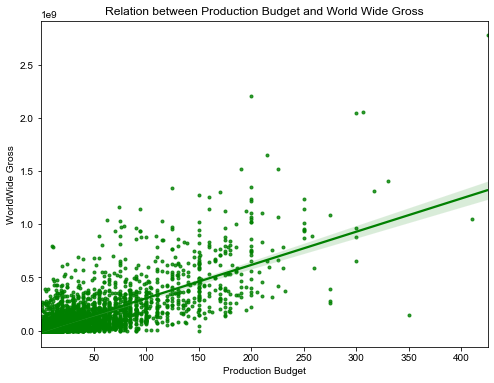

In [25]:
# Let's plot it.

# Creating the fig and setting a style
fig, ax = plt.subplots(figsize= (8,6))
sns.set(color_codes=True)

# Scatter plot, in color green and with some transparency
sns.regplot(x = budgets['Budget']/1000000, y = budgets['WorldWide Gross'], color = 'green', marker = '.');

# Adding labels and title
ax.set_title('Relation between Production Budget and World Wide Gross')
ax.set_ylabel('WorldWide Gross')
ax.set_xlabel('Production Budget');


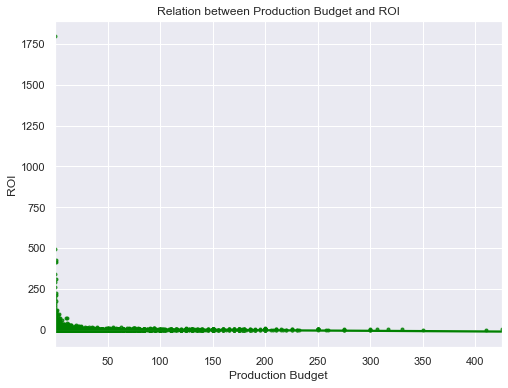

In [26]:
# Let's plot it.

# Creating the fig and setting a style
fig, ax = plt.subplots(figsize= (8,6))
sns.set(color_codes=True)

# Scatter plot, in color green and with some transparency
sns.regplot(x = budgets['Budget']/1000000, y = budgets['ROI'], color = 'green', marker = '.');

# Adding labels and title
ax.set_title('Relation between Production Budget and ROI')
ax.set_ylabel('ROI')
ax.set_xlabel('Production Budget');

For anaylisis purposes we will cathegorize our data into 3 groups:  

Low Budget Movies  
Medium Budget Movies  
High Budget Movies  

We will use the first .33 percentile of our data for Low Budget Movies,   
The second .33 percentile for Medium Budget Movies,  
And the last .33 percentile for High Budget Movies.  

This grouping was made in order to have the same amount of data in each of the groups we will be analyzing.

In [27]:
# Slicing by budget
# We will use percentiles to slice our data
# Low Budget Movies
low_budget = budgets.loc[budgets['Budget'] <= (budgets['Budget'].quantile(.33))]
low_budget['ROI'].describe()

count    1921.000000
mean        7.691143
std        50.724167
min        -1.000000
25%        -0.964953
50%         0.083970
75%         3.906910
max      1799.000000
Name: ROI, dtype: float64

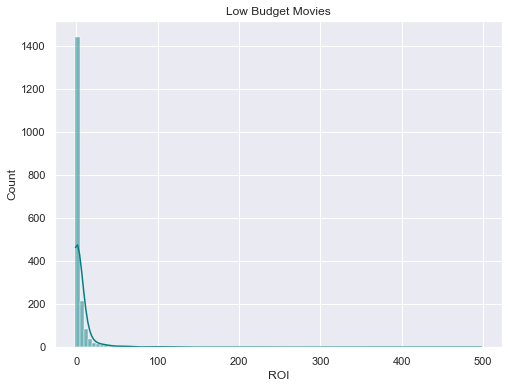

In [28]:
# Looking at our data we decided to get rid of the outliers to have a better look on our histplot
clean_low_budget = low_budget.drop(low_budget[low_budget['ROI'] > 1750].index)

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(clean_low_budget['ROI'], kde=True, bins=100, color = 'teal')
ax.set_xlabel('ROI')
ax.set_title('Low Budget Movies');

In [29]:
# Medium Budget Movies
medium_budget = budgets.loc[(budgets['Budget'] >= budgets['Budget'].quantile(.34)) 
                            & (budgets['Budget'] <= budgets['Budget'].quantile(.65))]
medium_budget['ROI'].describe()

count    1810.000000
mean        2.084656
std         4.928638
min        -1.000000
25%        -0.453097
50%         0.585754
75%         2.597222
max        74.520507
Name: ROI, dtype: float64

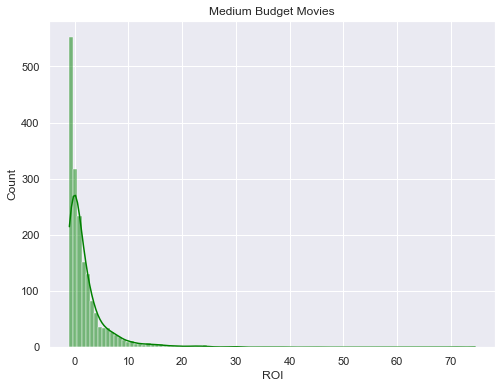

In [30]:
# Histogram 
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(medium_budget['ROI'], kde=True, bins=100, color = 'green')
ax.set_xlabel('ROI')
ax.set_title('Medium Budget Movies');

In [31]:
# High Budget Movies

high_budget = budgets.loc[budgets['Budget'] 
                          >= (budgets['Budget'].quantile(.66))]
high_budget['ROI'].describe()

count    2012.000000
mean        1.626771
std         2.330091
min        -1.000000
25%         0.000884
50%         1.068202
75%         2.471338
max        18.927371
Name: ROI, dtype: float64

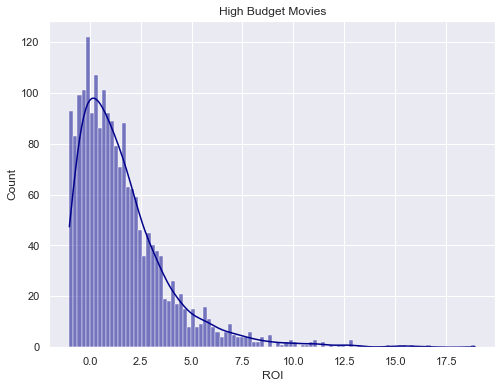

In [32]:
# Histogram
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(high_budget['ROI'], kde=True, bins=100, color = 'darkblue')
ax.set_xlabel('ROI')
ax.set_title('High Budget Movies');

So, what are the range of budgets of each of these groups? 

In [33]:
# Range of Budgets
print('Low Budget is between $', low_budget['Budget'].min(), 'and $', low_budget['Budget'].max())
print('Medium Budget is between $', medium_budget['Budget'].min(), 'and $', medium_budget['Budget'].max())
print('High Budget is between $', high_budget['Budget'].min(), 'and $', high_budget['Budget'].max())

Low Budget is between $ 1100 and $ 8000000
Medium Budget is between $ 9000000 and $ 29000000
High Budget is between $ 30000000 and $ 425000000


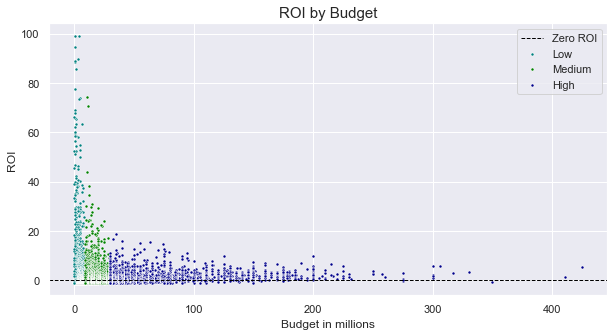

In [34]:
# Let's plot this in a way we can see the different groups.
# For visualization purposes,we will just show the data below 100 points of ROI

cleanhundred_low = low_budget[low_budget['ROI'] < 100]
cleanhundred_medium = medium_budget[medium_budget['ROI'] < 100]
cleanhundred_high = high_budget[high_budget['ROI'] < 100]

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=(cleanhundred_low['Budget']/1000000), y=cleanhundred_low['ROI'], color = 'teal', marker = '.', label= 'Low')
sns.scatterplot(x=(cleanhundred_medium['Budget']/1000000), y=cleanhundred_medium['ROI'], color = 'green', marker = '.', label= 'Medium')
sns.scatterplot(x=(cleanhundred_high['Budget']/1000000), y=cleanhundred_high['ROI'], color = 'darkblue', marker = '.', label = 'High')
ax.axhline(0,color='black',linestyle='--',lw=1,label='Zero ROI')
ax.set_title('ROI by Budget', fontsize = 15)
ax.set_xlabel('Budget in millions')
ax.legend();


Now we know how our data is distributed, and if you can appreciate from the plots, you will find there are some movies with no return of investment. This could be usefull for our analysis. 

In [35]:
budgetwith_roi = len(budgets[budgets['ROI']> 0])
print ('The percentage of movies with ROI is', round(budgetwith_roi/len(budgets['ROI']),3))
print ('The percentage of movies without ROI is', 1-round(budgetwith_roi/len(budgets['ROI']),3))

The percentage of movies with ROI is 0.632
The percentage of movies without ROI is 0.368


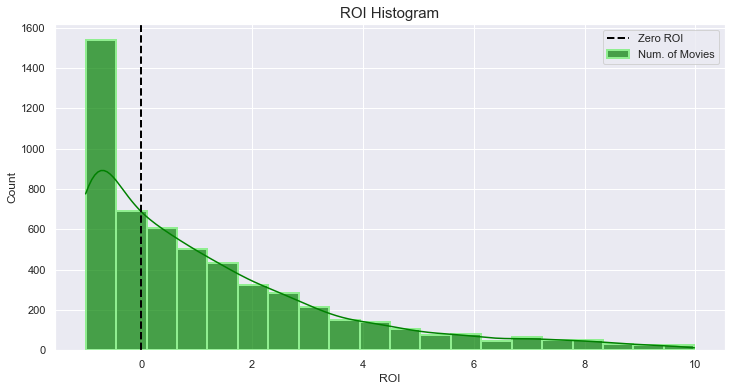

In [36]:
#Let's plot it. 
#For visualization purposes we will only plot movies below 10 points of ROI 

cleanclean_budget = budgets[budgets['ROI'] < 10]
fig, ax = plt.subplots(figsize=(12,6))
sns.set(color_codes=True)
sns.histplot(cleanclean_budget['ROI'], kde = True, bins=20, color = 'green', ec = 'lightgreen', lw = 2, alpha = .7, label = 'Num. of Movies', legend = True)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Zero ROI')
ax.set_title('ROI Histogram', fontsize = 15)
ax.legend();

How is this distributed by budget? 

In [37]:
# Calculating the quantity of movies that have any kind of ROI (more than 0)

lowbudget_wroi = len(low_budget[low_budget['ROI']> 0])
mediumbudget_wroi = len(medium_budget[medium_budget['ROI']> 0])
highbudget_wroi = len(high_budget[high_budget['ROI']> 0])

# Calculating the percentage 

print ('The percentage of low budget movies with ROI is', round(lowbudget_wroi/len(low_budget['ROI']),3))
print ('The percentage of medium budget movies with ROI is', round(mediumbudget_wroi/len(medium_budget['ROI']),3))
print ('The percentage of high budget movies with ROI is', round(highbudget_wroi/len(high_budget['ROI']),3))

The percentage of low budget movies with ROI is 0.515
The percentage of medium budget movies with ROI is 0.624
The percentage of high budget movies with ROI is 0.75


In [38]:
# Let's do a dataframe of this info.

data = {'Budget':  ['Low Budget', 'Medium Budget', 'High Budget'],
        'Success': [round(lowbudget_wroi/len(low_budget['ROI']),3),round(mediumbudget_wroi/len(medium_budget['ROI']),3) , round(highbudget_wroi/len(high_budget['ROI']),3)],
        'Failure': [1-(round(lowbudget_wroi/len(low_budget['ROI']),3)),1-(round(mediumbudget_wroi/len(medium_budget['ROI']),3)) , 1 - (round(highbudget_wroi/len(high_budget['ROI']),3))]
        }
budget_percent = pd.DataFrame(data)
print(budget_percent)

          Budget  Success  Failure
0     Low Budget    0.515    0.485
1  Medium Budget    0.624    0.376
2    High Budget    0.750    0.250


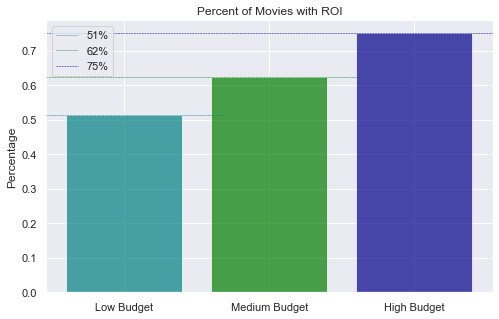

In [39]:
# Let's plot it 

# Colors I want on my plot
my_colors = ['teal','green','darkblue']

# Creating the figure
fig, ax = plt.subplots(figsize=(8,5))

# Bar plot
ax.bar(budget_percent['Budget'], budget_percent['Success'], color= my_colors, alpha = .7)

# Adding horizontal lines 
ax.axhline(.515,xmin= 0,xmax= .4, color='teal',linestyle='--',lw=.5,label='51%')
ax.axhline(.624,xmin= 0,xmax= .7, color='green',linestyle='--',lw=.5,label='62%')
ax.axhline(.75,xmin= 0,xmax= 1, color='darkblue',linestyle='--',lw=.5,label='75%')

# Adding labels and title
ax.set_ylabel('Percentage')
ax.legend(loc= 'best')  
ax.set_title('Percent of Movies with ROI')

plt.show()

¿How is this distributed?

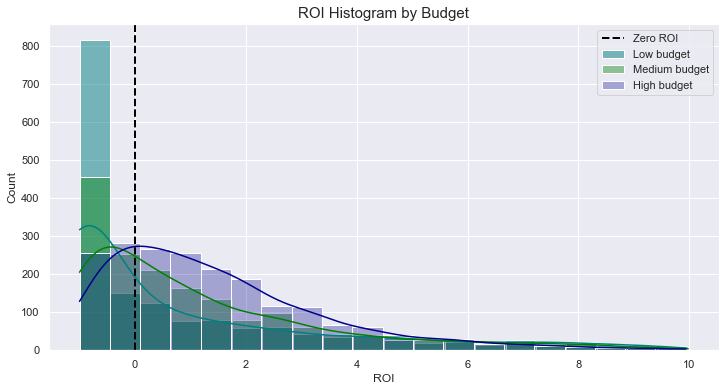

In [40]:
# For visualization purposes we will only plot movies below 10 points of ROI

cleanclean_low = low_budget[low_budget['ROI'] < 10]
cleanclean_medium = medium_budget[medium_budget['ROI'] < 10]
cleanclean_high = high_budget[high_budget['ROI'] < 10]

fig, ax = plt.subplots(figsize=(12,6))
sns.set(color_codes=True)
sns.histplot(cleanclean_low['ROI'], kde=True, bins=20, color = 'teal', alpha = .5, label = 'Low budget', legend = True)
sns.histplot(cleanclean_medium['ROI'], kde=True, bins=20, color = 'green', alpha = .4, label = 'Medium budget', legend = True )
sns.histplot(cleanclean_high['ROI'], kde=True, bins=20, color = 'darkblue', alpha = .3, label = 'High budget')
ax.axvline(0,color='black',linestyle='--',lw=2,label='Zero ROI')
ax.set_title('ROI Histogram by Budget', fontsize = 15)
ax.legend();

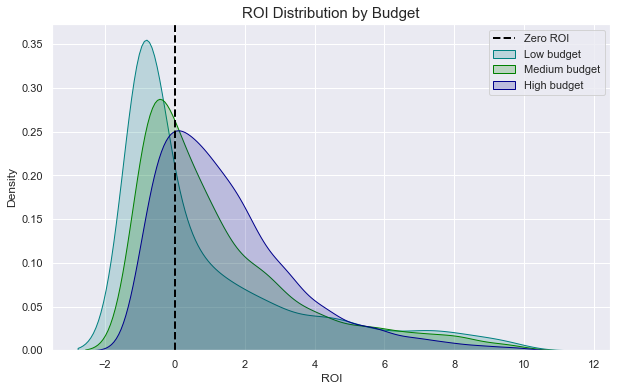

In [41]:
# Let's see a KDE to appreciate it better.

fig, ax = plt.subplots(figsize=(10,6))
sns.set(color_codes=True)
sns.kdeplot(cleanclean_low['ROI'], color = 'teal',  fill = True, label = 'Low budget', legend = True, alpha = .2, linewidth = 1)
sns.kdeplot(cleanclean_medium['ROI'], color = 'green',fill = True, label = 'Medium budget', legend = True, alpha = .2, linewidth = 1 )
sns.kdeplot(cleanclean_high['ROI'], color = 'darkblue',fill = True, label = 'High budget', alpha = .2, linewidth = 1)
ax.axvline(0,color='black',linestyle='--',lw=2,label='Zero ROI')
ax.set_title('ROI Distribution by Budget', fontsize = 15)
ax.legend();
plt.savefig('KDE_roi.png')

As we can see, there is a greater rate of success on high budget movies but it seems our ROI is higher with low budget movies.  
Let's do a quick calculation of ROI mean by budgets.

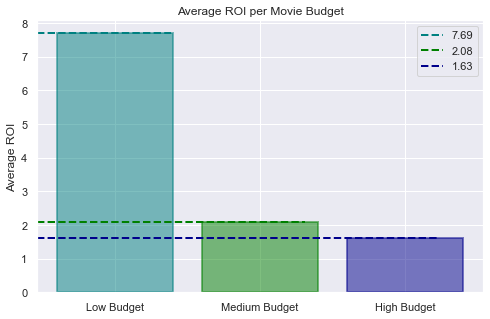

In [42]:
x = ('Low Budget', 'Medium Budget', 'High Budget')
y = (low_budget['ROI'].mean(), medium_budget['ROI'].mean(), high_budget['ROI'].mean())
my_colors = ['teal','green','darkblue']
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, y, color= my_colors, alpha = .5, edgecolor= my_colors,linewidth = 2)

ax.set_ylabel('Average ROI')
ax.axhline(low_budget['ROI'].mean(),xmin= 0,xmax= .3, color='teal',linestyle='--',lw=2,label=round(low_budget['ROI'].mean(),2))
ax.axhline(medium_budget['ROI'].mean(),xmin= 0,xmax= .6, color='green',linestyle='--',lw=2,label=round(medium_budget['ROI'].mean(),2))
ax.axhline(high_budget['ROI'].mean(),xmin= 0,xmax= .9, color='darkblue',linestyle='--',lw=2,label=round(high_budget['ROI'].mean(),2))
ax.legend(loc= 'best')  
ax.set_title('Average ROI per Movie Budget')
plt.show()

It seems we have a really big difference between the rest of the movies.  

This will give us the perfect opportunity for an hypothesis testing.  

#### Let's try! 

## Hypothesis Testing  

#### H1 = The ROI of low budget movies is higher than the rest of movies.   

#### H0 = The ROI of low budget movies is not different from the rest of the movies

In [43]:
# First we will named our variables 

mu = budgets['ROI'].mean()
x_bar = low_budget['ROI'].mean()
sigma = low_budget['ROI'].std()
n = len(low_budget['ROI'])
df = n-1
diff = x_bar - mu

In [44]:
# Now let's do a t-test

t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

3.362079435878072

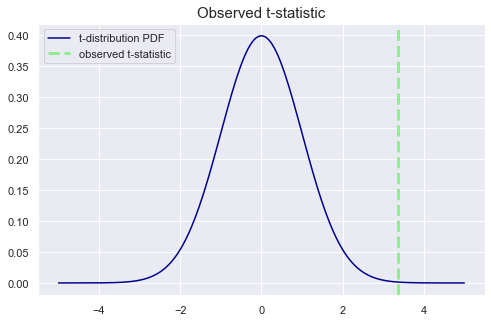

In [45]:
# Our t-statistic is visually on the light green line of this plot 

fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(-5, 5, 200)
y = stats.t.pdf(x, df, 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='lightgreen', linestyle='--', lw=3,label='observed t-statistic')
ax.set_title('Observed t-statistic', fontsize = 15)
ax.legend();

In [46]:
# We set our alpha level : 5% 
t_crit = stats.t.ppf(1 - 0.05, df=df)
t_crit

1.6456476421094641

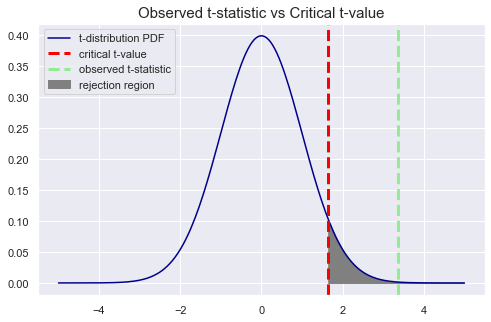

In [47]:
# Here is visually where our t-critical value is (red line)


fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph

ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='red',linestyle='--',lw=3,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='lightgreen', linestyle='--', lw=3,label='observed t-statistic')
ax.set_title('Observed t-statistic vs Critical t-value', fontsize = 15)
ax.legend();


Visually we could determined that is possible to reject our null hypothesis. 
Let's see if that is actually true.

In [48]:
results = stats.ttest_1samp(
    a=low_budget['ROI'],   # the entire array-like sample
    popmean=budgets['ROI'].mean() # the mean you are testing the sample against
)


alpha = 0.05

t_crit = stats.t.ppf(1 - alpha, df=len(low_budget['ROI'])-1)

if results.statistic > t_crit:
    print("Null hypothesis rejected.")
    print("The increase in ROI is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in ROI is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in ROI is statistically significant at the 0.05 level.


## Yes! It is possible to reject our null hypothesis!  
### Our ROI is significantly higher on the low budget movies!

Let's wrap this up.

# The Recommendation

Based on our findings, there is a greater rate of success on high budget movies, despite this fact,  
the average roi is of only 1.6.  
At the other side, there is more risk with low budget movies, just 51% of them achieve a return of their ivestments,  
but they have a much higher *(statistically significant higher)* return of investment.   

So, what's the recommendation?   

### Diversify!   

You should be aware that low budget movies had a lower rate of success but there's a great chance of getting  
more than six times the money you spend! In the other hand, a couple of high budget movies will ensure you have  
more chances of succes. 
#### Something is better than nothing!! 

# Next Steps  

#### So, what is next?  

There are a lot to do now. 

Whats the ratio of low and high budget movies you shoould have on your portafolio?   
Why do some movie fail?    
Which kind of movies are the most profitable ones?    
Which genre gives you the better profits?    
There is a relation between popularity, ratings and profits?    



# Thank you!!